In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from knn import KNN

In [7]:
male_data = pd.read_csv ( 'ANSUR_II_MALE_Public.csv', encoding = "latin-1")
female_data = pd.read_csv ( 'ANSUR_II_FEMALE_Public.csv', encoding = "latin-1")
data = pd.concat([male_data,female_data ])


In [8]:
#preprocess

In [9]:
data['weightkg'] = data['weightkg'] / 10
data['stature'] = data['stature'] / 10 
data['waistcircumference'] = data['waistcircumference'] /10 
data['chestcircumference'] = data['chestcircumference'] /10 
data['Gender'] = data['Gender'].replace(['Female','Male'], [0,1])


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
def generate_dataset():
    # weight = data['weightkg'].to_numpy()
    # height = data['stature'].to_numpy()
    # wci = data['waistcircumference'].to_numpy()
    # chest = data['chestcircumference'].to_numpy()
    X = data[['weightkg','stature','waistcircumference','chestcircumference']].to_numpy()
    Y = data['Gender'].to_numpy()
    return X,Y


In [12]:
X,Y = generate_dataset()
X,Y

(array([[ 81.5, 177.6,  93.3, 107.4],
        [ 72.6, 170.2,  87. , 102.1],
        [ 92.9, 173.5,  96.4, 112. ],
        ...,
        [ 76.2, 164.4,  98.2, 109.3],
        [ 63.2, 161.6,  83.7,  92.2],
        [ 61. , 164.1,  89.1,  90.2]]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=4)
len(x_test)


1214

In [14]:
x_test, y_test

(array([[ 90. , 179. ,  94.9, 102.7],
        [ 88. , 177.7, 101.3, 109.2],
        [ 64.5, 163.7,  78.6,  95.3],
        ...,
        [ 91.3, 171.8, 104. , 113.8],
        [ 95.1, 181.8, 100.3, 108.7],
        [ 70.2, 165.9,  91. , 103. ]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [52]:
k = 7

In [53]:
knn = KNN(k=k)
knn.fit(x_train , y_train)
sample1 = np.array([85,  164.9, 94.9, 128] )
sample2 = np.array([90 , 156.1, 102, 99])
sample3 = np.array([52.3  , 169 ,79,98])
sample4 = np.array([80.4 , 190.5, 91,122])
sample5 = np.array([70 , 170 , 103,109])
samples = [sample1, sample2, sample3, sample4, sample5]
outputs = knn.predict(samples)
print(outputs)
for output in outputs: 
    if output == 0 : 
        print('Female👩')
    else:
        print('Male👨')

[1, 0, 0, 1, 1]
Male👨
Female👩
Female👩
Male👨
Male👨


In [54]:
knn.evaluate(x_test , y_test)

0.8920922570016474

In [48]:
#Confusion Matrix

In [49]:
y_pred = knn.predict(x_test)
def cm(y_pred, y_test):
    confusion_matrix = np.zeros((2,2))
    for i in range (len(x_test)):
        if y_pred[i] == 0 and  y_test[i] == 0:
            confusion_matrix[0][0] += 1 
        if y_pred[i] == 0 and y_test[i] == 1 :
            confusion_matrix[0][1] += 1
        if y_pred[i] == 1 and y_test[i] == 0 :
            confusion_matrix[1][0] += 1 
        if y_pred[i] == 1 and y_test[i] == 1 :
            confusion_matrix[1][1] += 1
    return(confusion_matrix)
        
confusion_matrix = cm(y_pred, y_test)
confusion_matrix

array([[312.,  60.],
       [ 78., 764.]])

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = k )
knn.fit(x_train , y_train)
knn.score(x_test, y_test)

0.886326194398682

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [34]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[312,  78],
       [ 60, 764]], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 

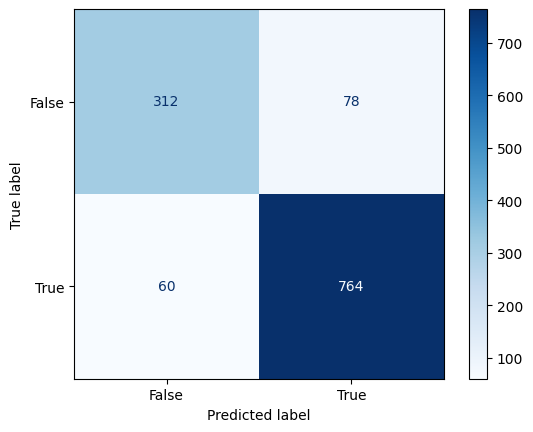

In [30]:
cm_display.plot(cmap=plt.cm.Blues)
plt.show() 